## Let's understand the data behind the meme through analysis of the cards

Most players or previous player of the gane can tell you that it's not what it used to be "back in the day". 

We can find how the official rules have changed [online](http://https://yugioh.fandom.com/wiki/TCG_Rule_Changes) for example in 2008.

But what we are insterrested here is how the cards themselves and their current playability have impacted the game.

For example through their special effects in Chains.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [2]:
#Loading the data
cards_filepath = "/kaggle/input/yugioh-cards/cards.csv"
cards_data = pd.read_csv(cards_filepath)

In [3]:
#Looking for empty cells in each column
missing_values_count = cards_data.isnull().sum()
missing_values_count[0:29]

id                     0
name                   0
type                   0
desc                   0
atk                 4650
def                 5065
level               5065
race                   1
attribute           4650
scale              12933
archetype           5493
linkval            12866
linkmarkers        12866
image_url              0
image_url_small        0
ban_tcg            13086
ban_ocg            13091
ban_goat           13208
staple             13217
views                  0
viewsweek              0
upvotes                0
downvotes              0
formats               13
treated_as         13139
tcg_date             416
ocg_date             400
konami_id            480
has_effect             0
dtype: int64

There are a lot of missing values regarding the characteristics of cards like atk, def, etc. but this is explained contextually because they only apply to the monster cards types.


In [4]:
#Looking for duplicates in cards names
total_values_cards = cards_data['name'].value_counts().sum()
total_unique_values_cards = cards_data['name'].nunique()

print("The number of entries in the name column is :",total_values_cards, ", and the number of unique entries in the name column is :",total_unique_values_cards)

The number of entries in the name column is : 13281 , and the number of unique entries in the name column is : 13281


There are no duplicates in the names of the cards so we can continue on with our analysis.

Here we can see their repartition of the type of cards in the data set :

Text(0, 0.5, 'Type')

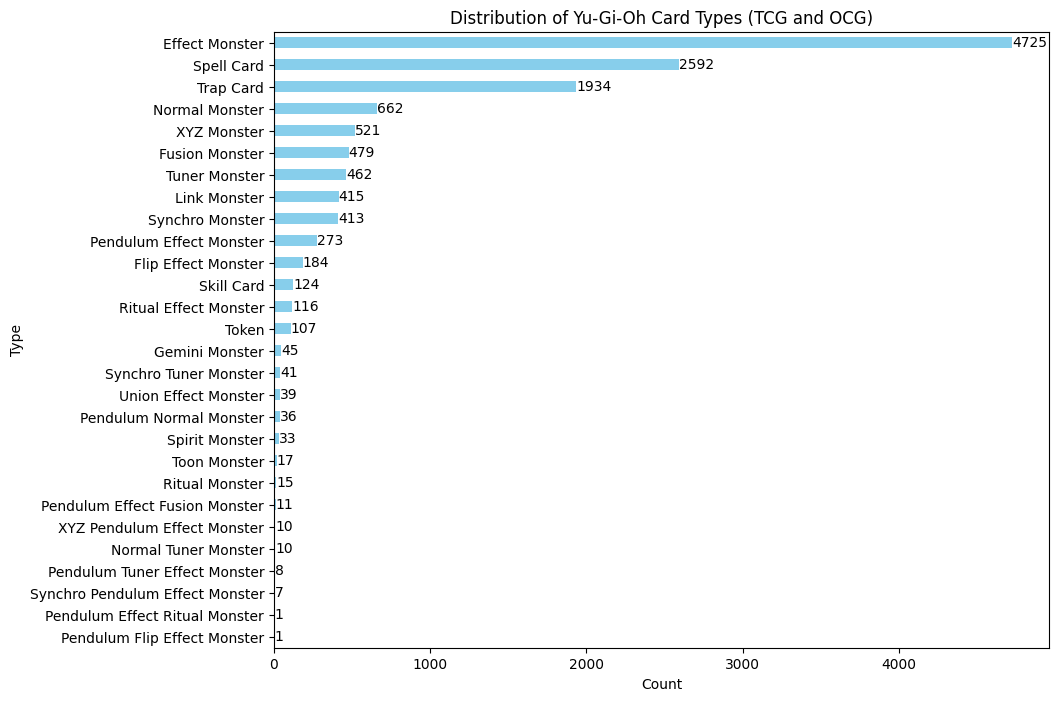

In [5]:
# Get the value counts for the 'type' column
type_counts = cards_data['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 8))
type_counts.sort_values().plot(kind='barh', color='skyblue')
# Add counts to the bars
for index, value in enumerate(type_counts.sort_values()):
    plt.text(value, index, str(value), va='center')  # `value` is the count, `index` is the bar position
plt.title('Distribution of Yu-Gi-Oh Card Types (TCG and OCG)')
plt.xlabel('Count')
plt.ylabel('Type')

In [6]:
cards_data['tcg_date'].dtype
print(cards_data['tcg_date'].head())

0    2007-05-16
1    2007-11-14
2    2016-11-03
3    2007-02-28
4    2023-07-27
Name: tcg_date, dtype: object


In [7]:
#Convert to the date format because the type of the column 'tcg_date' is object
cards_data['tcg_date_parsed']= pd.to_datetime(cards_data['tcg_date'], format= "%Y-%m-%d")
cards_data['tcg_date_parsed'].head()

0   2007-05-16
1   2007-11-14
2   2016-11-03
3   2007-02-28
4   2023-07-27
Name: tcg_date_parsed, dtype: datetime64[ns]

In [8]:
#Convert to the date format because the type of the column 'ocg_date' is object
cards_data['ocg_date_parsed']= pd.to_datetime(cards_data['ocg_date'], format= "%Y-%m-%d")
cards_data['ocg_date_parsed'].head()

0   2007-02-15
1   2007-07-21
2   2016-07-09
3   2006-11-16
4   2023-04-22
Name: ocg_date_parsed, dtype: datetime64[ns]

The Yu-Gi-Oh game and cards are separated into 2 categories depending on your location : TCG (Trading Card Game) and OCG (Original Card Game).
> OCG is played in asia (Japan, Korea, China and so on) while the TCG is played everywhere else (America, Europe and so on). (source: https://yugipedia.com/wiki/Forum:What_is_OCG_and_TCG%3F_whats_the_difference%3F)

In competitive spheres the rules and availability of the cards are different depending on TCG and OCG. This include cards that have become banned. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


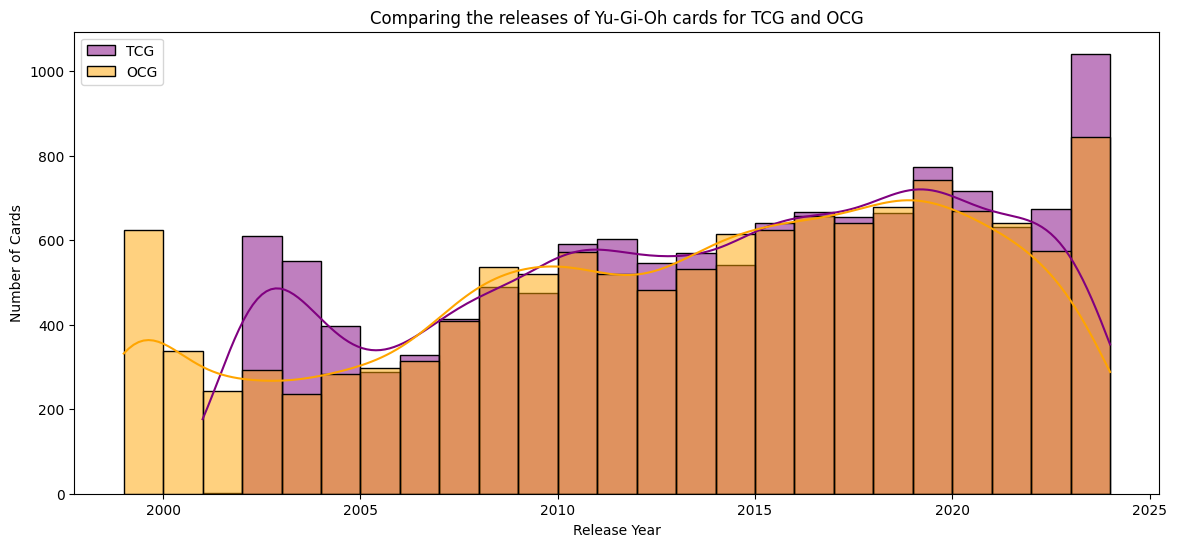

In [9]:
#Let's analyse the number of cards releases
cards_data["tcg_year"] = cards_data["tcg_date_parsed"].dt.year
cards_data["ocg_year"] = cards_data["ocg_date_parsed"].dt.year

plt.figure(figsize=(14,6))
plt.title("Comparing the releases of Yu-Gi-Oh cards for TCG and OCG")
sns.histplot(cards_data["tcg_year"], color="purple", label="TCG", kde=True, bins=range(int(cards_data["tcg_year"].min()), int(cards_data["tcg_year"].max()) + 1) )
sns.histplot(cards_data["ocg_year"], color= "orange", label= "OCG", kde=True, bins=range(int(cards_data["ocg_year"].min()), int(cards_data["ocg_year"].max()) + 1))
plt.xlabel("Release Year")
plt.ylabel("Number of Cards")
plt.legend()
plt.show()

In [10]:
print("The earliest year a card was released on for the Original Card Game (OCG) was", int(cards_data["ocg_year"].min()),
      ", and the earliest year for the more international Trading Card Game (TCG) was",int(cards_data["tcg_year"].min()) ,"." )

The earliest year a card was released on for the Original Card Game (OCG) was 1999 , and the earliest year for the more international Trading Card Game (TCG) was 2001 .


In [11]:
tcg_2001=0
tcg_2002=0

for i in cards_data["tcg_year"]:
    if i ==2001:
        tcg_2001 +=1

for i in cards_data["tcg_year"]:
    if i ==2002:
        tcg_2002 +=1
        
print("The number of cards released during the first year of TCG was :", tcg_2001, "; and the second year :", tcg_2002, ".")
print("The first card released in 2001 for TCG was :" , cards_data.loc[cards_data["tcg_year"] == 2001, "name"].iloc[0])

print(cards_data.loc[cards_data["tcg_year"] == 2001, "formats"])

The number of cards released during the first year of TCG was : 1 ; and the second year : 609 .
The first card released in 2001 for TCG was : Summoned Skull
11002    GOAT|OCG GOAT|Duel Links|Common Charity|Speed ...
Name: formats, dtype: object
